# 13주차(화) 실습문제 - 로지스틱 회귀모델 (Ch.6.3)

제출시 HTML(.html) 형식으로 다운로드한 뒤, 올려주세요.

In [188]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리 (경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision %.3f
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

data = pd.read_csv("health2018.csv")
data20 = data[data.age <= 20]  # 만 19~24세 남녀 데이터

## 1. 신체 정보로 남/여 성별 예측하기
### 1-1. data20에 male 열을 추가하고 남성은 1, 여성은 0의 값을 저장하라. 이후 height, weight, waist, BMI 값 각각으로 남성인지 여부(male)를 예측하는 로지스틱 회귀곡선 그래프를 그려보라.
어느 변수가 남성과 여성을 구분(분류)하는데 가장 유용한가?
남성과 여성 차이를 구분하기 가장 힘든 변수는 무엇인가?

<ipython-input-189-c1b2af238a54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data20["male"] = [1 if s == 'M' else 0 for s in data20.sex]
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


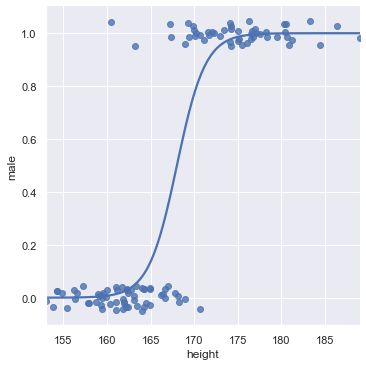

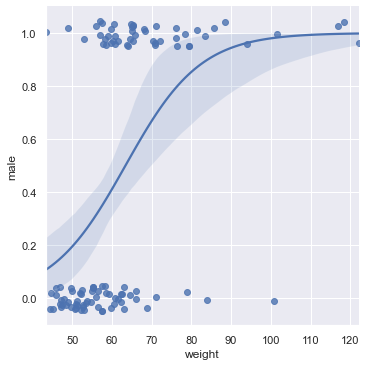

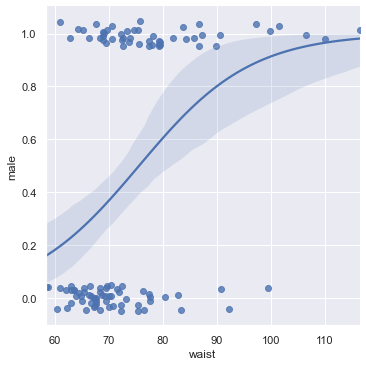

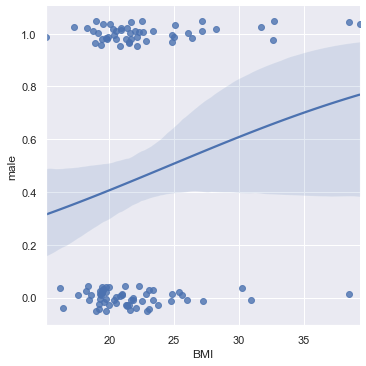

In [189]:
data20["male"] = [1 if s == 'M' else 0 for s in data20.sex]
sns.lmplot(x = "height", y = "male", data = data20, logistic = True, y_jitter = 0.05)
sns.lmplot(x = "weight", y = "male", data = data20, logistic = True, y_jitter = 0.05)
sns.lmplot(x = "waist", y = "male", data = data20, logistic = True, y_jitter = 0.05)
sns.lmplot(x = "BMI", y = "male", data = data20, logistic = True, y_jitter = 0.05)

### 1-2. height 값을 이용해 남성 여부(male)를 예측하는 로지스틱 회귀 모델을 만들고, null model과 비교하라. 
height 변수는 통계적으로 유의미한 계수 값을 갖는가? 

로그 우도(Log-Likelihood)와 Deviance 값은 각각 어떠한가?

In [190]:
mod1 = smf.glm(formula = "male ~ height", data = data20, family=sm.families.Binomial()).fit()
print(mod1.summary())
mod0 = smf.glm(formula = "male ~ 1", data = data20, family=sm.families.Binomial()).fit()
print(mod0.summary())

print([mod1.llf, mod0.llf])
print([mod1.deviance, mod0.deviance])

# hieght 값의 계수가 z test 기준 p < 0.001 이므로 예측에 유효하다.
# 로그 우도는 약 -21.09, -76.39로 height값에 기반한 모델이 더 잘 예측한다.
# deviance는 약 42.181, 152.79로 height값에 기반한 모델이 잔차가 더 적다.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   male   No. Observations:                  111
Model:                            GLM   Df Residuals:                      109
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21.090
Date:                Tue, 25 May 2021   Deviance:                       42.181
Time:                        11:44:53   Pearson chi2:                     146.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -102.8850     21.504     -4.784      0.0

### 1-3. height, weight, waist, BMI 값을 이용한 예측 모델을 각각 만들고(각각 하나의 독립변수로 예측), 더 성능이 좋은 순으로 나열해보라. 

In [191]:
mod1 = smf.glm(formula = "male ~ height", data = data20, family=sm.families.Binomial()).fit()
mod2 = smf.glm(formula = "male ~ weight", data = data20, family=sm.families.Binomial()).fit()
mod3 = smf.glm(formula = "male ~ waist", data = data20, family=sm.families.Binomial()).fit()
mod4 = smf.glm(formula = "male ~ BMI", data = data20, family=sm.families.Binomial()).fit()

print([mod1.llf, mod2.llf, mod3.llf, mod4.llf])
print([mod1.deviance, mod2.deviance, mod3.deviance, mod4.deviance])

# height > weight > waist > BMI 순서

[-21.090254279963958, -60.663780538057665, -66.43140656861594, -74.82633414676829]
[42.18050855992793, 121.32756107611533, 132.86281313723188, 149.65266829353658]


### 1-4. height값에 기반한 모델로 data20의 각 샘플(행)에 대해 남성인지 확률을 추정하시오. 또한 확률 p >= 0.5 이상이면 남성, p < 0.5 면 여성으로 분류해서 predicted_sex 열에 저장하고, 예측이 틀린 샘플을 찾아 출력하시오.
height 값에 기반한 로지스틱 회귀모델이 예측에 실패한 경우는 몇 명인가?

In [192]:
data20['predict'] = mod1.predict()
data20['predicted_sex'] = np.where(data20.predict >= 0.5, 'M', 'F')
data20_miss = data20[(data20.sex != data20.predicted_sex)]
print(data20_miss)

# 아래 8명의 경우, 키(height) 만으로 남성/여성을 식별할 수 없었음.

              ID sex  age  height  weight  waist        BMI  Blood_glucose  \
182   A906029304   M   20   167.2    58.4   75.3  20.890090             95   
1792  C909024703   M   20   163.2    58.9   68.8  22.114391             84   
2731  H902024603   M   19   167.3    60.7   77.9  21.686867             82   
2809  H904022504   F   20   168.3    55.3   67.6  19.523465             88   
2978  H908029504   F   20   169.0    62.3   69.2  21.812962             80   
3305  H918029203   F   20   170.7    56.5   68.3  19.390161             84   
3393  H921032101   F   20   168.1    66.1   83.3  23.391929             81   
3592  H926033603   M   20   160.4    48.9   64.2  19.006412             95   

      male   predict predicted_sex  
182      1  0.376598             F  
1792     1  0.049580             F  
2731     1  0.391079             F  
2809     0  0.542285             M  
2978     0  0.645238             M  
3305     0  0.837416             M  
3393     0  0.511768             M  
3

<ipython-input-192-36ab0f6043ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data20['predict'] = mod1.predict()
<ipython-input-192-36ab0f6043ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data20['predicted_sex'] = np.where(data20.predict >= 0.5, 'M', 'F')


---

## 2. 로지스틱 회귀모델에 기반한 당뇨병 환자 분류 예측
전체 검사자를 포함한 data 변수에 diabete 열을 추가하고, Blood_glucose > 125인 경우를 1로, 그외의 경우 0을 저장하시오.

### 2-1. 단일 요인(독립변수)를 이용해 당뇨병 여부(diabete)를 가장 잘 예측하는 로지스틱 회귀 모델을 만들어라. 이 모델의 AIC 값은 얼마인가?
(단, Blood_glucose는 사용할 수 없다.)

* 원한다면, 

In [194]:
data['diabete'] = np.where(data.Blood_glucose > 125, 1, 0)

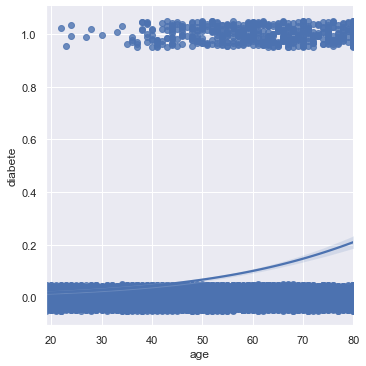

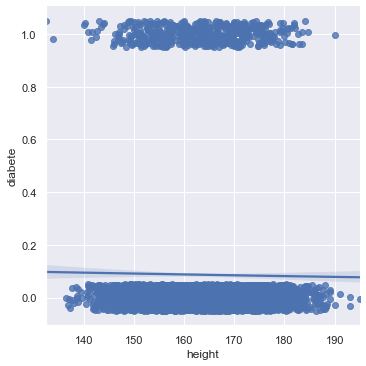

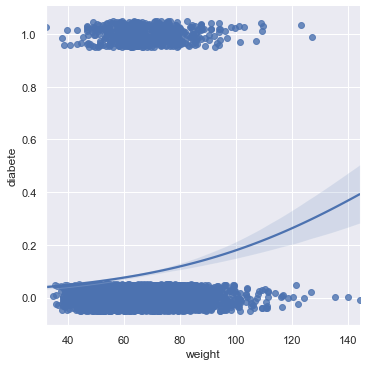

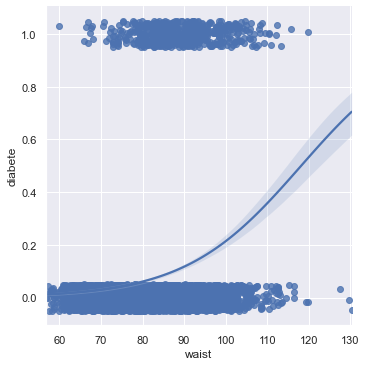

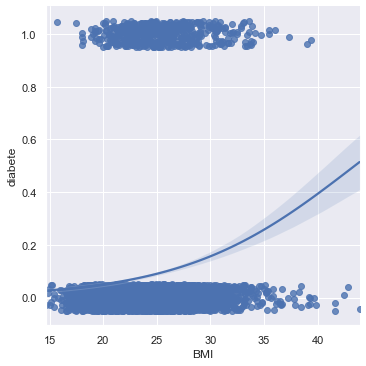

In [203]:
#sns.lmplot(x = "sex", y = "diabete", data = data, logistic = True, y_jitter = 0.05)
sns.lmplot(x = "age", y = "diabete", data = data, logistic = True, y_jitter = 0.05)
sns.lmplot(x = "height", y = "diabete", data = data, logistic = True, y_jitter = 0.05)
sns.lmplot(x = "weight", y = "diabete", data = data, logistic = True, y_jitter = 0.05)
sns.lmplot(x = "waist", y = "diabete", data = data, logistic = True, y_jitter = 0.05)
sns.lmplot(x = "BMI", y = "diabete", data = data, logistic = True, y_jitter = 0.05)

### 2-2. 단일 요인(독립변수)를 이용해 당뇨병 여부(diabete)를 가장 잘 예측하는 로지스틱 회귀 모델을 만들어라. 이 모델의 AIC 값은 얼마인가?
(단, Blood_glucose는 사용할 수 없다.)

In [168]:
mod1 = smf.glm(formula = "diabete ~ sex", data = data, family=sm.families.Binomial()).fit()
mod2 = smf.glm(formula = "diabete ~ age", data = data, family=sm.families.Binomial()).fit()
mod3 = smf.glm(formula = "diabete ~ height", data = data, family=sm.families.Binomial()).fit()
mod4 = smf.glm(formula = "diabete ~ weight", data = data, family=sm.families.Binomial()).fit()
mod5 = smf.glm(formula = "diabete ~ waist", data = data, family=sm.families.Binomial()).fit()
mod6 = smf.glm(formula = "diabete ~ BMI", data = data, family=sm.families.Binomial()).fit()

#print([mod1.pearson_chi2, mod2.pearson_chi2, mod3.pearson_chi2, mod4.pearson_chi2, mod5.pearson_chi2, mod6.pearson_chi2])
#print([mod1.deviance, mod2.deviance, mod3.deviance, mod4.deviance, mod5.deviance, mod6.deviance])
print([mod1.aic, mod2.aic, mod3.aic, mod4.aic, mod5.aic, mod6.aic])

[5967.999999999885, 5622.54759066314, 5968.155203786333, 5911.857791477911, 5651.4019216998795, 5860.172290023038]
[3483.4543578489593, 3310.2978851882153, 3521.1636645170715, 3470.772286355435, 3268.6992485032324, 3415.753838845457]
[3487.4543578489593, 3314.2978851882153, 3525.1636645170715, 3474.772286355435, 3272.699248503232, 3419.753838845457]


### 2-2. 여러 개의 요인(독립변수)를 이용해 당뇨병 여부(diabete)를 가장 잘 예측하는 로지스틱 회귀 모델을 만들어라. 이 모델은 어떤 요인을 포함하는가? AIC 값은 얼마인가?
회귀모델에 포함한 독립변수의 각 계수가 통계적으로 유의한지 여부도 확인하시오.

In [183]:
mod1 = smf.glm(formula = "diabete ~ waist", data = data, family=sm.families.Binomial()).fit()
print(mod1.aic)

3272.699248503232


In [184]:
mod2 = smf.glm(formula = "diabete ~ waist + age", data = data, family=sm.families.Binomial()).fit()
print(mod2.aic)

3125.6234909461123


In [185]:
mod3 = smf.glm(formula = "diabete ~ waist + age +BMI", data = data, family=sm.families.Binomial()).fit()
print(mod3.aic)
mod3.summary()

3115.9960744013224


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                diabete   No. Observations:                 5968
Model:                            GLM   Df Residuals:                     5964
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1554.0
Date:                Tue, 25 May 2021   Deviance:                       3108.0
Time:                        11:42:19   Pearson chi2:                 5.31e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.2963      0.481    -21.387      0.000     -11.240      -9.353
waist          0.0961      0.010      9.850      0.000       0.077       0.115
age            0.0343      0.003     10.223      0.000       0.028       0.041
BMI           -0.0891      0.026     -3.376      0.001      -0.141      -0.037
==============================================================================
"""

In [186]:
mod4 = smf.glm(formula = "diabete ~ waist +age +BMI +weight", data = data, family=sm.families.Binomial()).fit()
print(mod4.aic)

# waist, age, BMI 요인을 포함한 로지스틱 회귀 모델(mod3)이 AIC = 3115.996 으로 가장 성능이 좋다.

3117.167056620874
